<a href="https://colab.research.google.com/github/Mrinal7862/Support_Vector_Machine/blob/main/SVM_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [63]:
x = np.linspace(-6.0, 6.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [64]:
x1 = np.linspace(-6.0, 6.0, 100)
y1 = np.sqrt(4**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

In [65]:
y1

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.69366807,  1.19226155,  1.52722463,
        1.79275145,  2.01646118,  2.21108319,  2.38375278,  2.53895274,
        2.67972012,  2.80822614,  2.92608672,  3.03454249,  3.13456983,
        3.22695261,  3.31233053,  3.39123269,  3.46410162,  3.53131082,
        3.5931779 ,  3.64997453,  3.70193407,  3.74925766,  3.79211884,
        3.83066742,  3.86503243,  3.8953246 ,  3.92163831,  3.94405319,
        3.9626354 ,  3.97743867,  3.98850506,  3.99586563,  3.99954084,
        3.99954084,  3.99586563,  3.98850506,  3.97743867,  3.9626354 ,
        3.94405319,  3.92163831,  3.8953246 ,  3.86503243,  3.83066742,
        3.79211884,  3.74925766,  3.70193407,  3.64997453,  3.5931779 ,
        3.53131082,  3.46410162,  3.39123269,  3.31233053,  3.22

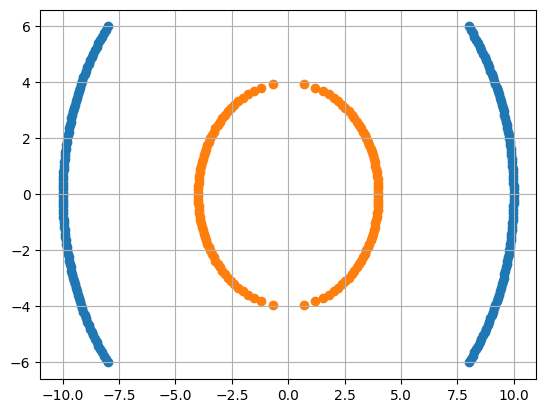

In [66]:
plt.scatter(y,x)
plt.grid()
plt.scatter(y1,x1)

In [67]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns=['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns=['X1', 'X2'])
df2['Y'] = 1

df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,X1,X2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0


In [68]:
#  Polynomial Kernel

df1 = df.copy()

In [69]:
df1['X1sq'] = df1.X1 ** 2
df1['X2sq'] = df1.X2 ** 2
df1['X1X2sq'] = df1.X2 *df1.X1
df1 = df1.dropna()

In [70]:
df1.head(5)

,X1,X2,Y,X1sq,X2sq,X1X2sq
0,8.000000,-6.000000,0,64.000000,36.000000,-48.000000
1,8.089490,-5.878788,0,65.439853,34.560147,-47.556397
2,8.176205,-5.757576,0,66.850321,33.149679,-47.075117
3,8.260230,-5.636364,0,68.231405,31.768595,-46.557662
4,8.341649,-5.515152,0,69.583104,30.416896,-46.005457


In [71]:
X = df1[["X1sq", "X2sq", "X1X2sq"]]
y = df1['Y']

In [72]:
X.head()

,X1sq,X2sq,X1X2sq
0,64.000000,36.000000,-48.000000
1,65.439853,34.560147,-47.556397
2,66.850321,33.149679,-47.075117
3,68.231405,31.768595,-46.557662
4,69.583104,30.416896,-46.005457


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [74]:
X_train.head()

,X1sq,X2sq,X1X2sq
365,12.470156,3.529844,6.634584
17,84.481175,15.518825,-36.208404
267,11.500459,4.499541,7.193524
235,12.910927,3.089073,-6.315282
88,78.222222,21.777778,41.273553


In [75]:
import plotly.express as px

In [76]:
px.scatter_3d(df1, x='X1sq', y='X2sq', z='X1X2sq', color='Y')


In [77]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

cls = SVC(kernel="linear")  # We created the features
cls.fit(X_train, y_train)
y_pred  = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [81]:
#  till now manually
# now using SVC kernels
df = df.dropna()
X= df[["X1", "X2"]]
y = df['Y']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [82]:
X_train

,X1,X2
365,-3.531311,-1.878788
17,9.191364,-3.939394
267,3.391233,2.121212
235,3.593178,-1.757576
88,8.844333,4.666667
...,...,...
220,1.792751,-3.575758
272,2.926087,2.727273
72,9.620914,2.727273
252,3.988505,0.303030


In [87]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

cls = SVC(kernel="poly")  # We created the features
cls.fit(X_train, y_train)
y_pred  = cls.predict(X_test)
print(accuracy_score(y_test, y_pred)*100 , "%")

62.0 %


In [88]:
# poly kernel didn't used well so we used rbf
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

cls = SVC(kernel="rbf")  # We created the features
cls.fit(X_train, y_train)
y_pred  = cls.predict(X_test)
print(accuracy_score(y_test, y_pred)*100 , "%")

100.0 %


In [89]:
# sigmoid
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

cls = SVC(kernel="sigmoid")  # We created the features
cls.fit(X_train, y_train)
y_pred  = cls.predict(X_test)
print(accuracy_score(y_test, y_pred)*100 , "%")

65.0 %
